In [27]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('nipy_spectral')
from scipy import stats
from sklearn.model_selection import train_test_split
import pydataset as data

from acquire import get_telco_data
from prepare import clean_telco_data, prep_telco_data

from env import get_db_url

α = .05

In [28]:
telco_df = get_telco_data()

In [29]:
train, validate, test = prep_telco_data(telco_df)

# Preliminary Notes:
- There were 11 customers that had no values in 'total_charges,' indicating that they had not been with the company long enough to be charged. This also means that they have not been a customer long enough to have churned, so these rows have been dropped. 

In [ ]:
# Key Takeaways:


# Univariate Exploration:

In [30]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id.1', 'contract_type',
       'payment_type_id.1', 'payment_type', 'internet_service_type_id.1',
       'internet_service_type', 'gender_Male', 'partner_Yes', 'dependents_Yes',
       'phone_service_Yes', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_m

## Number Churned:

<AxesSubplot:title={'center':'A Large Number of Customers Churned'}, xlabel='churn', ylabel='Count'>

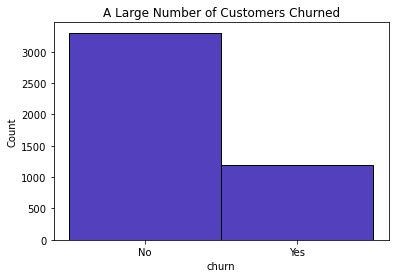

In [35]:
plt.title("A Large Number of Customers Churned")
sns.histplot(train, x = 'churn', legend = True)

In [17]:
# Percentage that Churned:

(train[train.churn == 'Yes'].count().churn / train.churn.shape[0]) * 100

#26.58% of customer churned this month.

26.57777777777778

## Customer Count by Gender:

<AxesSubplot:title={'center':'Gender Appears to be Evenly Distributed'}, xlabel='gender', ylabel='Count'>

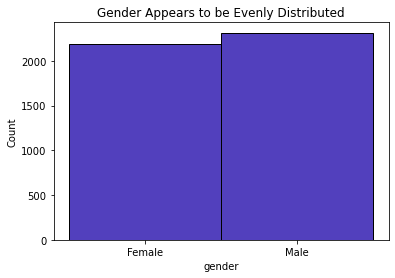

In [72]:
plt.title("Gender Appears to be Fairly Evenly Distributed")
sns.histplot(train, x = 'gender', legend = True)

In [75]:
train.gender.value_counts()

#There are slightly more males than females.

Male      2315
Female    2185
Name: gender, dtype: int64

# Bivariate Analysis:

<AxesSubplot:title={'center':'A Large Number of Customers Churned'}, xlabel='churn', ylabel='Count'>

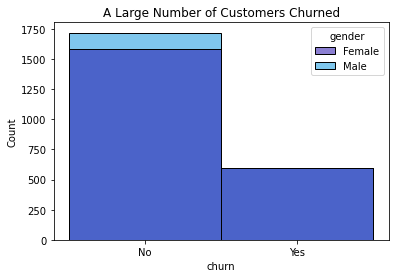

In [70]:
plt.title("A Large Number of Customers Churned")
sns.histplot(train, x = 'churn', legend = True, hue = 'gender')

# I need to come back and find a way to stack these. 

In [73]:
train.groupby('churn').gender.value_counts(normalize = True)

#There doesn't appear to be any major relationship between gender and churn. 

churn  gender
No     Male      0.519976
       Female    0.480024
Yes    Female    0.500836
       Male      0.499164
Name: gender, dtype: float64